# INF8111 - Fouille de données

## TP2 Automne 2024 - Exploration de données musicales avec clustering

##### Date limite: 09/11

##### Membres de l'équipe:

    - Mohamed Ali LAJNEF  (2404991) 
    - Yannis YAHYA (1886365) 

##### Livrables :

Vous devez soumettre le fichier suivant sur Moodle. Les questions de ce TP totalisent 20 points.
1. (Obligatoire) Ce notebook avec votre code.
2. (Facultatif) Un rapport PDF comprenant les discussions écrites des questions.

##### Présentation

Les techniques de clustering peuvent être utilisées pour suivre l'évolution de la musique au fil du temps en regroupant les chansons sur la base de leurs caractéristiques audio, telles que le volume sonore, le tempo, le caractère dansant et l'énergie. En divisant un ensemble de données musicales en périodes spécifiques, des groupes peuvent être formés pour chaque période, révélant ainsi les tendances et les changements dans les styles musicaux. Cette approche permet aux chercheurs de saisir et de visualiser la progression des caractéristiques musicales, en découvrant des modèles qui pourraient ne pas être évidents dans le cadre d'une analyse traditionnelle.

Dans ce travail, vous utiliserez des techniques de clustering pour extraire des informations significatives sur la musique au cours des dernières décennies. Enfin, votre objectif est d'utiliser les techniques de regroupement pour construire un système de recommandation pour les utilisateurs qui cherchent des suggestions de nouvelles chansons à écouter. Il est prévu que vous utilisiez les méthodes de regroupement précédentes, mais ne vous y limitez pas. Un degré élevé de créativité dans cette partie sera également récompensé.

Toutes les questions seront évaluées sur la base du code écrit, ainsi que de l'explication écrite des résultats (le cas échéant). Lorsqu'elles ne sont pas explicitement interdites, toutes les bibliothèques Python de base (NumPy, Pandas, Scikit-Learn, etc.) peuvent être utilisées. La créativité du code, l'ajout de commentaires (expliquant chaque étape du code) et la vitesse d'exécution du code auront un impact important sur votre évaluation globale. Une question aura un maximum de points si elle s'exécute sous Windows ou Linux, en montrant le résultat attendu et sans lancer d'exceptions. Si la question n'est pas exécutable sous Windows ou Linux, vous perdrez des points. 

-----

## TP2 Autumn 2024 - Music data mining using clustering

##### Due date: 09/11

##### Team Members:

    - Mohamed Ali LAJNEF  (2404991) 
    - Yannis YAHYA (1886365) 
    
##### Deliverables:

You must submit the following file to Moodle. The questions in this TP total 20 points.
1. (Mandatory) This notebook with code.
2. (Optional) PDF report including written discussions of the questions.

#####  Overview

Clustering techniques can be employed to track changes in music over time by grouping songs based on their audio features, such as loudness, tempo, danceability, and energy. By dividing a music dataset into specific time periods, clusters can be formed for each period, revealing trends and shifts in musical styles. This approach allows researchers to capture and visualize the progression of music characteristics, uncovering patterns that might not be evident through traditional analysis.

In this work, you will use clustering techniques to extract meaningful information about music over the last decades. Lastly, your goal is to use clustering techniques to build a recommendation system for users looking for suggestions of new songs to hear. You are expected to use the previous clustering methods, but do not feel limited to them. A high degree of creativity in this part will be equally rewarded.

All questions will be evaluated based on the written code, as well as the written explanation of the results (when applicable). When not explicitly prohibited, all basic Python libraries (NumPy, Pandas, Scikit-Learn, etc.) can be used. The creativity of the code, the addition of comments (explaining each step of the code), and the speed of code execution will greatly impact your overall evaluation. A question will have maximum points if it runs on Windows or Linux, showing the expected result, and without throwing exceptions. If the question is not executable on Windows or Linux, you will lose its points. 

## Partie 1 - Construction des méthodes de clustering/Building the Clustering Methods

### Q1 - Chargement des données/Loading Data **(0.5 pt)**

##### Dans ce travail, vous utiliserez l'ensemble de données musicales *TP2_hits*, qui contient diverses caractéristiques des chansons des dernières décennies, telles que les noms des chansons, les noms des artistes et les caractéristiques musicales.

##### Pour commencer votre travail, chargez l'ensemble de données musicales *TP2_hits.csv* et affichez ses 5 premiers résultats.

-----

##### In this work, you will use the *TP2_hits* music dataset, which contains various features of songs from the past decades, such as song names, artist names, and musical characteristics.

##### To begin your work, load the *TP2_hits.csv* music dataset and display its top 5 results.

In [959]:
import copy

import pandas as pd

from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from scipy.cluster.hierarchy import fcluster
from sklearn.neighbors import NearestNeighbors

In [960]:
import warnings
warnings.simplefilter(action='ignore')

In [961]:
hits = pd.read_csv('TP2_hits.csv', delimiter=';')
raw_hits = copy.copy(hits)
hits_copy  = hits

In [962]:
hits[:5]

,song_name,name_artists,popularity,explicit,song_type,num_artists,num_available_markets,release_date,duration_ms,key,...,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,"thank u, next",['Ariana Grande'],87,True,Solo,1,79,2019-02-08,207320,1,...,4,0.22900,0.717,0.653,0.000000,0.1010,-5.634,0.0658,0.412,106.966
1,Without Me,['Halsey'],87,True,Solo,1,79,2018-10-04,201661,6,...,4,0.29700,0.752,0.488,0.000009,0.0936,-7.050,0.0705,0.533,136.041
2,SICKO MODE,['Travis Scott'],86,True,Solo,1,79,2018-08-03,312820,8,...,4,0.00513,0.834,0.730,0.000000,0.1240,-3.714,0.2220,0.446,155.008
3,Sunflower - Spider-Man: Into the Spider-Verse,"['Post Malone', 'Swae Lee']",92,False,Collaboration,2,79,2018-12-14,158040,2,...,4,0.55600,0.760,0.479,0.000000,0.0703,-5.574,0.0466,0.913,89.911
4,High Hopes,['Panic! At The Disco'],86,False,Solo,1,78,2018-06-22,190947,5,...,4,0.19300,0.579,0.904,0.000000,0.0640,-2.729,0.0618,0.681,82.014


#### Explication des données utilisées : 
- song_name : Le titre de la chanson (par exemple : thank u, next).
name_artists : Liste des artistes participant à la chanson, ici présentée sous forme de liste (par exemple : ['Ariana Grande']).
- popularity : Score de popularité de la chanson (sur une échelle de 0 à 100). Plus le score est élevé, plus la chanson est populaire.
- explicit : Indique si la chanson contient du contenu explicite (valeurs booléennes : True ou False).
- song_type : Type de chanson, indiquant si elle est solo ou une collaboration (exemple : Solo).
- num_artists : Nombre d'artistes impliqués dans la chanson (par exemple : 1 pour thank u, next).
- num_available_markets : Nombre de marchés dans lesquels la chanson est disponible (par exemple : 79).
- release_date : Date de sortie de la chanson, formatée en JJ/MM/AAAA.
- duration_ms : Durée de la chanson en millisecondes (exemple : 207320 ms correspond à environ 3 minutes et 27 secondes).
- key : La clé musicale de la chanson, représentée par un numéro (exemple : 1 correspond à la tonalité Do majeur).
- mode : Mode de la chanson (1 = majeur, 0 = mineur).
- time_signature : Nombre de temps par mesure, communément 4 pour les chansons populaires.
- acousticness : Indice de confiance indiquant si la chanson est acoustique (compris entre 0 et 1).
- danceability : Indicateur de la facilité à danser sur la chanson (plus proche de 1 signifie plus dansant).
- energy : Mesure de l’énergie et de l’intensité de la chanson (valeur entre 0 et 1).
- instrumentalness : Probabilité que la chanson soit instrumentale (valeur proche de 1 = peu de paroles).
- liveness : Indique si la chanson a été enregistrée en live (valeur proche de 1 = haute probabilité de live).
- loudness : Niveau de volume moyen de la chanson en décibels (dB).
- speechiness : Mesure de la présence de paroles parlées (valeurs élevées = plus proche de la parole que du chant).
- valence : Indice de positivité musicale (proche de 1 = musique joyeuse et positive).
- tempo : Vitesse du morceau en battements par minute (BPM).

### Q2 - Transformer et normaliser les données/Transforming and Normalizing Data **(1 pt)**

##### Lorsque les caractéristiques ont des échelles très différentes, il est important de ramener toutes les valeurs à une échelle commune. Dans cette question, vous devez appliquer les transformations et normalisations nécessaires à l'ensemble de données, en fonction de votre point de vue.

##### Conseil: vous devez supprimer les noms des chansons et des artistes et vous concentrer uniquement sur les caractéristiques numériques.

-----

##### When features have significantly different scales, it is important to bring all the values to a common scale. In this question, you should apply the necessary transformations and normalizations to the dataset, based on your perspective.

##### Tip: You should remove the song and artist names and focus only on the numerical features.

Tout d'abord, nous transformons les données non-numériques en données numériques. Nous utilisons LabelEncoder pour encoder l'attribut song_type. Nous créons également deux nouveaux attributs : release_date_unix, qui représente la date de sortie en format Unix (secondes depuis l'époque Unix), et explicit, que nous convertissons en entier.Enfin, nous normalisons toutes les données numériques restantes à l'aide de StandardScaler, afin de les rendre adaptées pour le clustering.

In [963]:
scaler = StandardScaler()
encoder = LabelEncoder()


numerical_data = hits.drop(columns=['song_name', 'name_artists'])
numerical_data['explicit'] = numerical_data['explicit'].astype(int)
numerical_data['release_date'] = pd.to_datetime(numerical_data['release_date'])
numerical_data['song_type'] = encoder.fit_transform(numerical_data['song_type'])
numerical_data['release_date_unix'] = numerical_data['release_date'].astype('int64') // 10**9


numerical_data.drop(columns='release_date' , inplace=True)
hits = pd.DataFrame(scaler.fit_transform(numerical_data) , columns=numerical_data.columns)



### Q3 - Clustering avec K-Means/Clustering with K-Means **(3 pt)**

##### Une technique de clustering largement utilisée est **K-Means**. K-Means est un algorithme qui répartit les données en un nombre prédéfini de clusters (K). Il assigne chaque point de données au groupe le plus proche en fonction de la distance au centroïde du groupe, qui représente la position moyenne des points au sein de ce groupe.

##### Dans cette question, vous devez regrouper l'ensemble de données à l'aide de K-Means et fournir une analyse textuelle des résultats. Votre méthode est-elle efficace pour regrouper les chansons présentant des caractéristiques similaires?

##### Les résultats du regroupement par K-Means dépendent fortement des centroïdes initiaux sélectionnés. Que pouvez-vous faire, dans votre code, pour réduire ces effets?

##### Enfin, comment sélectionner, dans votre code, le nombre optimal de clusters? Existe-t-il des mesures qui peuvent vous aider?

-----

##### A widely used clustering technique is **K-Means**. K-Means is an algorithm that partitions data into a predefined number of clusters (K). It works by assigning each data point to the nearest cluster based on the distance to the cluster's centroid, which represents the average position of the points within that cluster.

##### In this question, you must cluster the dataset using K-Means and provide a textual analysis of the results. Is your method effective in grouping songs with similar characteristics?

##### The results of K-Means clustering are highly dependent on the initial centroids selected. What can you do to reduce these effects?

##### Finally, how do you select the optimal number of clusters? Are there any metrics that can help with this?

In [964]:
### CODE
K = range(1,10)
inertia_1 = []
silhouette_scores = []
for k in K : 
    kmeans_1 = KMeans(n_clusters=k, init='k-means++', n_init=10 , random_state=110).fit(hits)
    inertia_1.append(kmeans_1.inertia_)
    if k > 1 : 
        score_PCA = silhouette_score(hits, kmeans_1.labels_)
        silhouette_scores.append(score_PCA)


Text(0.5, 1.0, 'Silhouette Score for different values of the number of clusters')

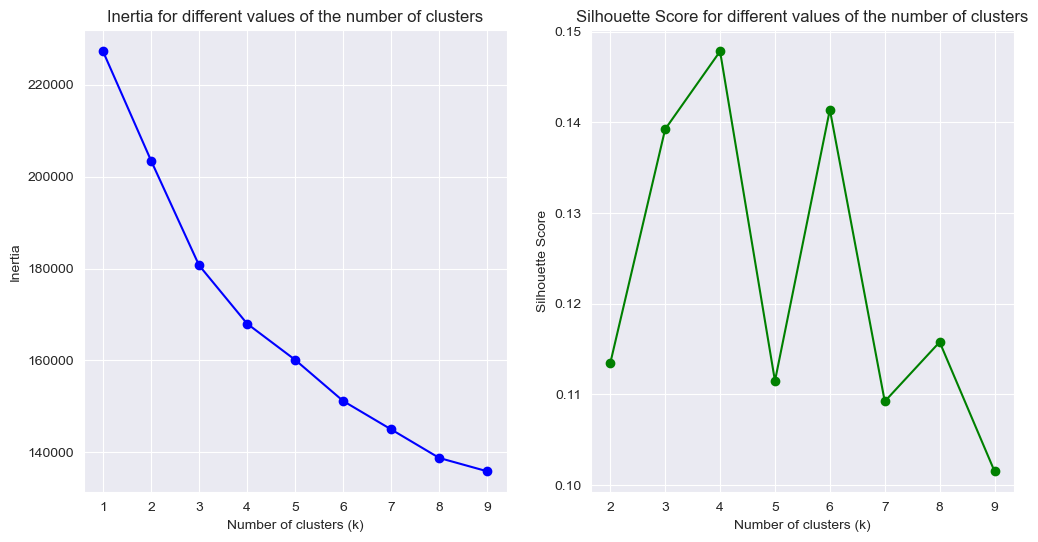

In [965]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(K, inertia_1, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Inertia for different values of the number of clusters')

# Tracé du Silhouette Score pour différents k
plt.subplot(1, 2, 2)
plt.plot(K[1:], silhouette_scores, 'go-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different values of the number of clusters')

#### Choix du nombre de clusters
On choisit de déterminer le nombre de clusters en analysant le silhouette score, en sélectionnant le nombre de clusters pour lequel ce score est le plus élevé. Nous aurions aussi pu sélectionner le nombre de clusters grâce à la méthode du coude, qui consiste à analyser la courbe de l'inertie (ou somme des distances entre chaque point et le centre de son cluster) en fonction du nombre de clusters. L'idée est de chercher un point où l'inertie cesse de diminuer rapidement, formant un 'coude' sur le graphique, ce qui indique un nombre optimal de clusters. La méthode du coude est simple et visuelle, mais elle peut parfois être subjective, car il peut être difficile de déterminer exactement où se trouve le 'coude', surtout si la courbe est irrégulière. De plus, elle ne prend pas en compte la qualité des clusters au-delà de la diminution de l'inertie, ce qui peut conduire à des choix sous-optimaux. En revanche, la méthode du silhouette score évalue non seulement la compacité des clusters, mais aussi leur séparation, fournissant ainsi une mesure plus précise de la qualité du clustering. 

#### Réduction du de l'effet du choix initial des centroides
Pour réduire l'effet du choîx initial des centroîdes on utilise K-means++ avec l'hyperparamètre n_init = 10.
- K-means++ choisit les centroîdes d'une manière plus optimale en indexant la probabilité qu'un point soit un centroîde à sa distance avec les autres centroîdes. Autrement dit plus un point est loin des centroîdes plus il aura de d'être choisi comme centroîde. 

- n_init choisit 10 configurations de centroides et détermine laquelle présente le moins d'inertie. 
On observe une diminution globale de l'inertie globale à mesure que l'on augmente le nombre de clusters. On peut estimer grâce à la méthode du coude le point d'inflexion à 4 clusters.  

#### Analyse sémantique des résultats

Nous analysons nos différents clusters par la méthode des centroîdes. Comme nos données sont normalisées (moyenne à 0), les caractéristiques les plus discriminantes sont celles qui s'écartent le plus. Nous affichons donc ceux-ci pour analyser par la suite nos clusters. 

In [966]:
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10 , random_state=110).fit(hits)

centroids = kmeans.cluster_centers_

# Créer un DataFrame pour une meilleure interprétation des centroïdes
centroid_df = pd.DataFrame(centroids, columns=hits.columns)

labels = kmeans.labels_
cluster_counts = pd.Series(labels).value_counts()

print('most discriminant characteristics for each cluster')
for i in range(len(centroid_df)):
    print(f"\nCluster {i + 1}: , number of observations in the cluster {cluster_counts[i]}")
    sorted_by_abs = centroid_df.iloc[i].abs().sort_values(ascending=False).index
    cluster_characteristics = centroid_df.iloc[i][sorted_by_abs]
    print(cluster_characteristics.head(5))  # Les 5 caractéristiques les plus importantes dans chaque cluster

most discriminant characteristics for each cluster

Cluster 1: , number of observations in the cluster 6294
energy          0.529036
acousticness   -0.467030
loudness        0.427096
explicit       -0.367258
song_type       0.286814
Name: 0, dtype: float64

Cluster 2: , number of observations in the cluster 909
song_type      -3.486576
num_artists     3.486576
speechiness     0.700444
explicit        0.642755
danceability    0.336537
Name: 1, dtype: float64

Cluster 3: , number of observations in the cluster 1176
explicit        2.568905
speechiness     1.482087
popularity      0.867665
danceability    0.705584
loudness        0.391451
Name: 2, dtype: float64

Cluster 4: , number of observations in the cluster 3580
acousticness    0.982949
energy         -0.980951
loudness       -0.937851
popularity     -0.712155
danceability   -0.438357
Name: 3, dtype: float64


In [967]:
centroid_df

,popularity,explicit,song_type,num_artists,num_available_markets,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,release_date_unix
0,0.229853,-0.367258,0.286814,-0.286814,-0.035584,0.151149,0.008532,-0.028959,0.136340,-0.467030,0.068796,0.529036,-0.113825,-0.033786,0.427096,-0.181190,0.181002,0.084631,-0.083923
1,0.089997,0.642755,-3.486576,3.486576,-0.170594,0.220572,-0.004233,-0.159463,0.101868,-0.171794,0.336537,0.099992,-0.061617,0.071097,0.229979,0.700444,0.027937,-0.134215,-0.123713
2,0.867665,2.568905,0.286814,-0.286814,0.011702,0.115994,0.065846,-0.377711,0.188278,-0.360048,0.705584,0.077901,-0.227824,0.023402,0.391451,1.482087,-0.338898,-0.025964,0.361400
3,-0.712155,-0.362209,0.286814,-0.286814,0.102019,-0.359834,-0.035571,0.215575,-0.327428,0.982949,-0.438357,-0.980951,0.290632,0.033644,-0.937851,-0.346617,-0.213842,-0.106151,0.060115


Nous remarquons que notre clustering arrive bien à rapprocher les chansons similaires entre elle. Voici pourquoi : 

- Cluster 1 (6 294 observations) :
Chansons énergétiques, avec moins d'éléments acoustiques, un volume modéré, et un contenu légèrement explicite. Probablement du pop/rock.

- Cluster 2 (909 observations) :
Des collaborations avec un contenu fortement vocal, souvent explicite, et modérément dansantes. Probablement du rap/hip-hop collaboratif.

- Cluster 3 (1 176 observations) :
Chansons très populaires, avec un contenu majoritairement explicite et orientées sur les paroles. Probablement du rap populaire.

- Cluster 4 (3 580 observations) :
Chansons très acoustiques, plus calmes et moins populaires, avec une faible énergie et un rythme modéré. Probablement des ballades acoustiques.







### Q4 - Réduction de la dimensionnalité et sélection des caractéristiques/Reducing dimension and selecting features **(2.5 pt)**

##### Lors d'un clustering avec de nombreuses caractéristiques, comme c'est le cas dans ce TP, deux techniques peuvent être utilisées : la **réduction de la dimensionnalité** et/ou la **sélection des caractéristiques**. Ces techniques améliorent les résultats du clustering en réduisant le bruit et en se concentrant sur les données les plus pertinentes, ce qui conduit à des regroupements plus clairs et plus significatifs.

##### Dans cette question, vous devez créer une méthode pour réduire les dimensions ou sélectionner les meilleures caractéristiques de l'ensemble de données. Vous êtes libre d'utiliser l'une ou l'autre de ces techniques, ou les deux. Vos résultats seront évalués sur la base de vos métriques, et non sur l'utilisation des deux techniques.

##### Après, regroupez les données en utilisant à nouveau K-Means, en employant les mêmes métriques que celles de la Q3. Enfin, rédigez une évaluation textuelle des différences trouvées.

-----

##### When clustering with many features, as is the case in this TP, two techniques that we can use are **dimensionality reduction** and/or **feature selection**. These techniques enhance clustering results by reducing noise and focusing on the most relevant data, leading to clearer, more meaningful groupings.

##### In this question, you must create a method to reduce the dimensions or select the best features from the dataset. It is up to you to use one or both techniques. Your results will be evaluated based on your metrics, not on the use of both techniques.

##### Then, cluster the data using K-Means again, employing the same metrics from Q3. Finally, write a textual evaluation of the differences found.

In [968]:
### CODE
from sklearn.decomposition import PCA
pca = PCA(n_components= 0.9)  # retain 90% of variance
data_reduced = pca.fit_transform(hits)


silhouette_scores_reduced = []
    
inertia_PCA = []
for k in K : 
    kmeans_2 = KMeans(n_clusters=k, init='k-means++', n_init=10 ,random_state=42).fit(data_reduced)
    inertia_PCA.append(kmeans_2.inertia_)
    if k > 1:
        score = silhouette_score(hits, kmeans_2.labels_)
        silhouette_scores_reduced.append(score)



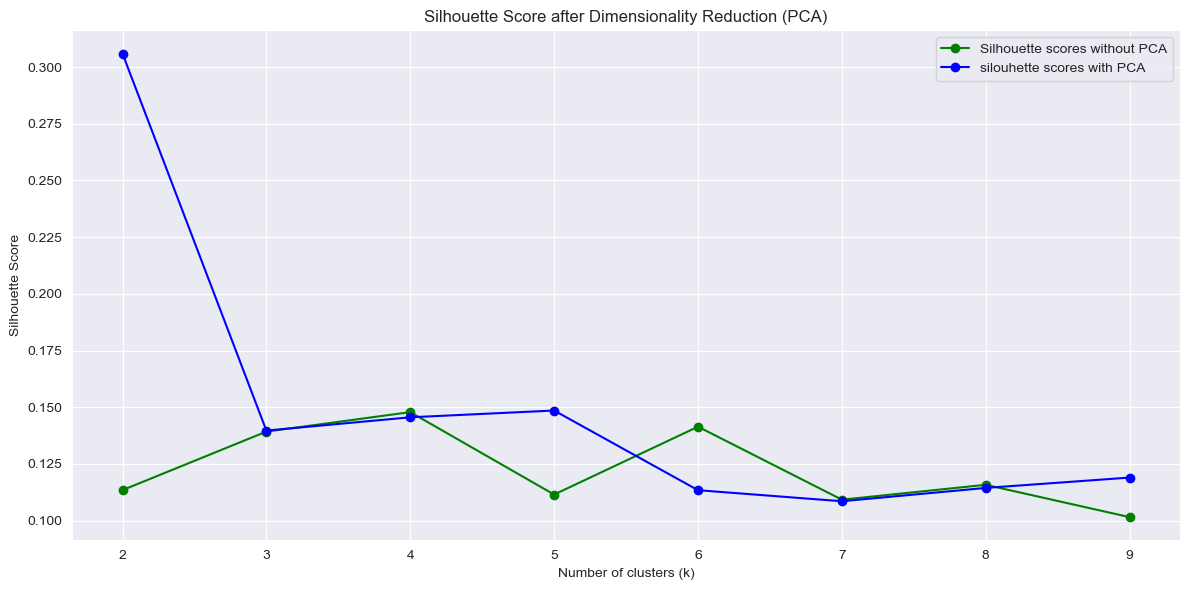

In [969]:
plt.figure(figsize=(12, 6))
plt.plot(K[1:], silhouette_scores, 'go-', label='Silhouette scores without PCA')
plt.plot(K[1:], silhouette_scores_reduced, 'bo-', label='silouhette scores with PCA')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score after Dimensionality Reduction (PCA)')
plt.legend()

plt.tight_layout()
plt.show()

On observe que avec la PCA nous obtenons un bien meilleur silouhette score maximal ici  (pour k=2). La PCA a donc amélioré notre résultat puisque le score maximal du silouhette score a augmenté.

#### Analyse sémantique des résultats :

Nous analysons nos clusters de la même manière que la question 3.

In [970]:
kmeans_PCA = KMeans(n_clusters=2, init='k-means++', n_init=10 , random_state=110).fit(data_reduced)

centroids = kmeans.cluster_centers_

labels_PCA = kmeans_PCA.labels_
centroid_df = pd.concat([hits[labels_PCA == i].mean() for i in range(2)], axis=1).T


cluster_counts = pd.Series(labels_PCA).value_counts()

print('most discriminant characteristics for each cluster')
for i in range(len(centroid_df)):
    print(f"\nCluster {i + 1}: , number of observations in the cluster {cluster_counts[i]}")
    sorted_by_abs = centroid_df.iloc[i].abs().sort_values(ascending=False).index
    cluster_characteristics = centroid_df.iloc[i][sorted_by_abs]
    print(cluster_characteristics.head(5))  # Les 5 caractéristiques les plus importantes dans chaque cluster

most discriminant characteristics for each cluster

Cluster 1: , number of observations in the cluster 7502
energy          0.501478
loudness        0.496321
acousticness   -0.492326
popularity      0.408154
danceability    0.232296
Name: 0, dtype: float64

Cluster 2: , number of observations in the cluster 4457
energy         -0.844086
loudness       -0.835405
acousticness    0.828681
popularity     -0.687002
danceability   -0.391000
Name: 1, dtype: float64


#### Cluster 1 (7 502 observations) :
Ce cluster regroupe des chansons énergétiques avec un volume sonore élevé, moins d'éléments acoustiques, et une popularité relativement élevée. Les morceaux ont aussi une danceability modérée, ce qui les rend légèrement adaptés à la danse. Ces caractéristiques suggèrent que ce groupe contient probablement des chansons pop ou électroniques à forte production.


In [971]:
raw_hits.iloc[labels_PCA == 0].sample(n = 5)

,song_name,name_artists,popularity,explicit,song_type,num_artists,num_available_markets,release_date,duration_ms,key,...,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
4995,I'll Never Break Your Heart,['Backstreet Boys'],61,False,Solo,1,78,1996-05-06,286787,7,...,3,0.0856,0.519,0.559,0.0,0.190,-6.474,0.0283,0.343,162.076
1312,Story of My Life,['One Direction'],77,False,Solo,1,79,2013-11-25,245493,3,...,4,0.2250,0.600,0.663,0.0,0.119,-5.802,0.0477,0.286,121.070
295,Takin' Shots,['Post Malone'],72,True,Solo,1,79,2018-04-27,216747,5,...,4,0.5970,0.767,0.625,0.0,0.409,-6.193,0.0836,0.577,120.092
11527,Let's Get Dirty (I Can't Get In Da Club),"['Redman', 'DJ Kool']",42,True,Collaboration,2,75,2001-05-22,235533,1,...,4,0.0542,0.539,0.966,0.0,0.466,-5.020,0.4330,0.432,99.142
11849,Love For Free - Streets Is Watching/Soundtrack...,"['Rell', 'JAY Z']",23,True,Collaboration,2,60,1998-01-01,250467,11,...,4,0.1980,0.735,0.674,0.0,0.124,-6.639,0.2310,0.878,89.932


### Cluster 2 (4 457 observations) :
Ce cluster se compose de chansons plus calmes et fortement acoustiques, avec un faible volume sonore et une énergie réduite. La popularité est plus faible, et les morceaux sont moins dansants. Cela indique que ce cluster est probablement constitué de morceaux folk, de ballades ou de chansons acoustiques plus intimistes.

In [972]:
raw_hits.iloc[labels_PCA == 1].sample(n = 5)

,song_name,name_artists,popularity,explicit,song_type,num_artists,num_available_markets,release_date,duration_ms,key,...,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
2219,Not Like The Movies,['Katy Perry'],51,False,Solo,1,77,2012-03-12,241320,8,...,4,0.881,0.402,0.479,0.000003,0.111,-7.750,0.0916,0.257,183.013
10789,Emotion In Motion - Acoustic Cover,"['Ric Ocasek', 'Lee Warne']",7,False,Collaboration,2,79,2019-03-01,192000,0,...,4,0.954,0.712,0.257,0.819000,0.104,-12.107,0.0878,0.536,169.828
10383,One Less Bell To Answer / A House Is Not A Hom...,['Glee Cast'],41,False,Solo,1,64,2010-05-18,282920,5,...,3,0.728,0.266,0.354,0.000000,0.123,-6.133,0.0318,0.134,106.300
8951,Cold Feet,['Albert King'],28,False,Solo,1,50,2007-01-01,165947,1,...,4,0.196,0.688,0.555,0.557000,0.294,-6.014,0.0612,0.643,81.122
8160,I'm Just Me,['Charley Pride'],9,False,Solo,1,0,1997-04-26,138902,2,...,4,0.665,0.636,0.413,0.000000,0.149,-11.668,0.0285,0.961,143.547


## Partie 2 - Analyse de clustering/Clustering analysis

### Q5 - Évaluer les changements dans la musique avec l'analyse des centroïdes/Evaluating the Changes in Music Using Centroid Analysis **(4 pt)**

##### Une autre technique largement utilisée en matière de clustering est l'**analyse centroïde**. L'analyse centroïde est utile pour interpréter les résultats des clusters, car elle révèle les tendances centrales des regroupements et met en évidence les principales caractéristiques et différences entre les groupes.

##### Vous allez maintenant travailler en tant que scientifique des données, en utilisant l'analyse centroïde pour examiner l'ensemble de données musicales. Vous devez diviser l'ensemble de données sur les hits en fonction des valeurs *release_date* suivantes:

1) De 1995 à 2000  
2) De 2001 à 2010  
3) De 2011 à 2019  

##### Rédigez ensuite une évaluation de l'évolution de la musique sur ces trois tranches temporelles. Vous devriez utiliser l'analyse des centroïdes pour suivre le mouvement des centroïdes des clusters K-Means au fil du temps, ce qui peut indiquer des changements dans les tendances musicales.

##### Conseil (non obligatoire): Sélectionnez deux caractéristiques et suivez leurs centroïdes pour observer leur évolution. Toutefois, les approches créatives sont vivement encouragées.

-----

##### Another widely used technique in clustering is **centroid analysis**. Centroid analysis is useful for interpreting clustering results, as it reveals the central tendencies of clusters and highlights key characteristics and differences between groups.

##### Now, you will work as a data scientist, using centroid analysis to examine the music dataset. You must split the hits dataset based on the following *release_date* values:

1) From 1995 to 2000  
2) From 2001 to 2010  
3) From 2011 to 2019  

##### Then, write an evaluation of the changes in music across these three time slices. You should use centroid analysis to track the movement of K-Means cluster centroids over time, which can indicate shifts in musical trends.

##### Tip (not mandatory): Select two features and track their centroids to observe how they change. However, creative approaches are highly encouraged.

#### regroupement des chansons selon  leur date

In [973]:
hits_copy['release_date'] = pd.to_datetime(hits_copy['release_date'])
hits_copy['year'] = hits_copy['release_date'].dt.year

old = hits_copy[(hits_copy['year'] >= 1995) & (hits_copy['year'] <= 2000)].select_dtypes(include=['number'])
medium =  hits_copy[(hits_copy['year'] >= 2001) & (hits_copy['year'] <= 2010)].select_dtypes(include=['number'])
new=  hits_copy[(hits_copy['year'] >= 2011) & (hits_copy['year'] <= 2019)].select_dtypes(include=['number'])

#### calcul des centroîdes

In [974]:
## calcul des centroîdes
old_centroid = old.mean(axis=0)
medium_centroid = medium.mean(axis=0)
new_centroid = new.mean(axis=0)

#### affichage des centroîdes

In [975]:
old_centroid

popularity                   35.562058
num_artists                   1.069844
num_available_markets        75.144408
duration_ms              235985.710241
key                           5.361963
mode                          0.694195
time_signature                3.944785
acousticness                  0.248472
danceability                  0.623155
energy                        0.630348
instrumentalness              0.032704
liveness                      0.190580
loudness                     -8.454187
speechiness                   0.070197
valence                       0.606586
tempo                       117.398495
year                       1997.571024
dtype: float64

In [976]:
medium_centroid

popularity                   36.736013
num_artists                   1.100276
num_available_markets        73.185382
duration_ms              226267.851852
key                           5.261623
mode                          0.728526
time_signature                3.939716
acousticness                  0.234339
danceability                  0.596593
energy                        0.669898
instrumentalness              0.036763
liveness                      0.197661
loudness                     -7.172347
speechiness                   0.077856
valence                       0.589318
tempo                       120.793379
year                       2006.158392
dtype: float64

In [977]:
new_centroid

popularity                   34.314652
num_artists                   1.052897
num_available_markets        75.188707
duration_ms              217436.875315
key                           5.216835
mode                          0.713686
time_signature                3.946893
acousticness                  0.270591
danceability                  0.604572
energy                        0.623664
instrumentalness              0.057420
liveness                      0.196524
loudness                     -8.067531
speechiness                   0.076547
valence                       0.561838
tempo                       121.636294
year                       2014.731948
dtype: float64

#### Tracking the centroids

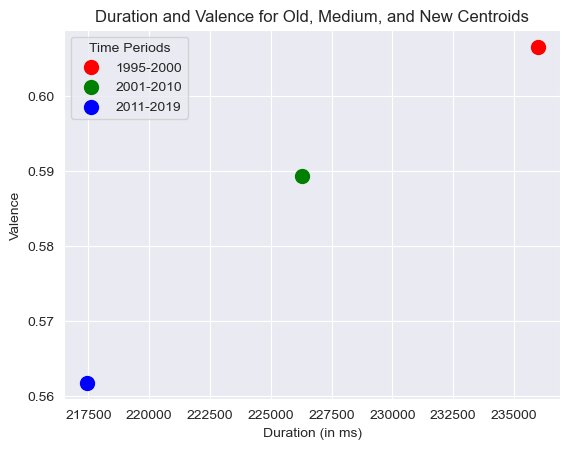

In [978]:
X = [old_centroid['duration_ms'], medium_centroid['duration_ms'], new_centroid['duration_ms']]  
Y = [old_centroid['valence'], medium_centroid['valence'], new_centroid['valence']]  

labels = ['1995-2000', '2001-2010', '2011-2019']

# Colors for each point
colors = ['red', 'green', 'blue']

plt.figure()


for i, label in enumerate(labels):
    plt.scatter(X[i], Y[i], color=colors[i], s=100, label=label)  

plt.ylabel('Valence')
plt.xlabel('Duration (in ms)')
plt.title('Duration and Valence for Old, Medium, and New Centroids')
plt.legend(title='Time Periods')

plt.grid(True)
plt.show()

Parmi les deux caractéristiques pertinentes à analyser, on peut sélectionner la durée et la valence. On remarque notamment que la durée des chansons est devenue beaucoup plus courte à mesure que la période a avancé. Ceci est dû à l’accélération du mode de vie général de la population (un mode de vie plus stressant et moins de temps libre). De plus, on observe que la valence (c'est-à-dire le taux de positivité) a également diminué au fil du temps, ce qui pourrait indiquer une tendance plus générale à une population moins joyeuse et plus triste.


Parmi les autres caractéristiques intéressantes, on note que le volume sonore a augmenté dans les années 2000 avant de diminuer récemment, probablement en raison de la fin de la "loudness war" et de la normalisation du volume sur les plateformes de streaming. L'énergie a suivi un schéma similaire : hausse dans les années 2000 avec des morceaux plus dynamiques, puis une baisse récente en lien avec une préférence croissante pour des musiques plus calmes et introspectives, reflétant une adaptation aux modes de vie plus stressants et à la recherche de détente des auditeurs.



### Q6 - Analyse des valeurs aberrantes avec DBSCAN/Analyzing outliers using DBSCAN **(2.5 pts)**

##### **DBSCAN** (Density-Based Spatial Clustering of Applications with Noise) est un algorithme de clustering qui regroupe les points en fonction de leur densité dans l'espace. Il identifie les points centraux, c'est-à-dire ceux qui ont un nombre minimum de points voisins à une certaine distance (*epsilon*). Ces points centraux forment le centre d'un cluster, et tous les points voisins situés à moins de *epsilon* sont affectés à ce cluster.

##### Une caractéristique importante de DBSCAN est sa capacité à identifier les valeurs aberrantes potentielles. Cette analyse est cruciale pour identifier les chansons qui diffèrent significativement des autres.

##### Dans cette question, vous allez regrouper les données à l'aide de DBSCAN. Tracez les données résultantes à l'aide d'une technique de réduction de la dimensionnalité. Ensuite, sélectionnez trois points aberrants et rédigez une analyse expliquant pourquoi ils sont considérés comme aberrants. La valeur *epsilon* est-elle importante pour identifier ces valeurs aberrantes?

-----

##### **DBSCAN** (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that groups points based on their density in space. It works by identifying core points—those that have a minimum number of neighboring points within a certain distance (*epsilon*). These core points form the center of a cluster, and all nearby points within *epsilon* are assigned to that cluster.

##### One important characteristic of DBSCAN is its ability to identify potential outliers. This analysis is crucial for identifying songs that differ significantly from others.

##### In this question, you will cluster the data using DBSCAN. Plot the resulting data using a dimensionality reduction technique. Then, select three outlier points and write an analysis of why they are considered outliers. Is the *epsilon* value important for identifying these outliers?

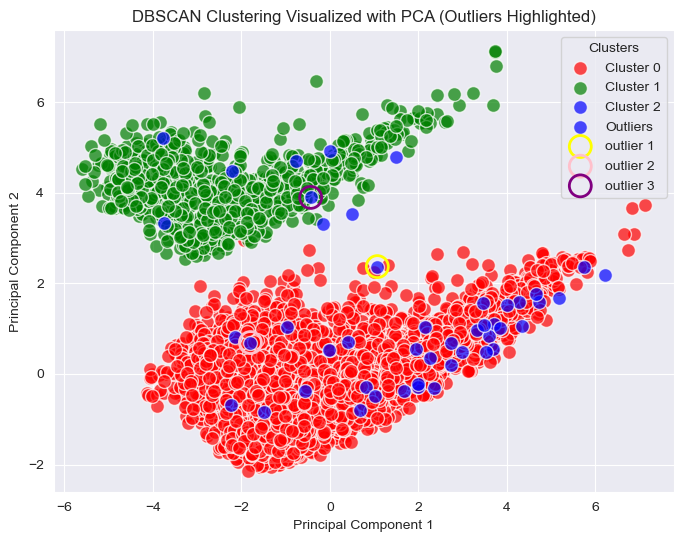

Outlier 1 has 1 neighbors within eps (5.3).
Outlier 2 has 1 neighbors within eps (5.3).
Outlier 3 has 1 neighbors within eps (5.3).


In [979]:
from matplotlib.colors import ListedColormap

dbscan = DBSCAN(eps=5.3, min_samples=5)
pca = PCA(n_components= 2)
data_reduced = pca.fit_transform(hits)
clusters = dbscan.fit_predict(hits)

plt.figure(figsize=(8, 6))

# Tracé des clusters
for i in range(max(clusters) + 1):  # Pour chaque cluster
    plt.scatter(data_reduced[clusters == i, 0], data_reduced[clusters == i, 1], color=colors[i], edgecolor='w', s=100, alpha=0.7, label=f'Cluster {i}')

# Tracé des outliers (cluster -1)
outliers = data_reduced[clusters == -1]

outliers_without_PCA = hits[clusters == -1]

plt.scatter(outliers[:, 0], outliers[:, 1], s=100, c='blue', edgecolor='w', label='Outliers' , alpha=0.7)


selected_outliers = outliers[:3] 
outliers_index = hits[clusters == -1].index

selected_outliers_without_PCA = outliers_without_PCA[:3]
colors_outliers = ['yellow' , 'pink' , 'purple']


for i,point in enumerate(selected_outliers):
    plt.scatter(point[0], point[1], s = 250,  edgecolors=colors_outliers[i] , facecolors='none' ,  linewidths=2 , label= f'outlier {i+1}')

# Ajouter une légende et afficher le graphique
plt.legend(title="Clusters")
plt.title('DBSCAN Clustering Visualized with PCA (Outliers Highlighted)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


# Analyser pourquoi ils sont aberrants
for i, point in enumerate(selected_outliers_without_PCA.values):
    distances = np.linalg.norm(hits - point, axis=1)
    neighbors_within_eps = np.sum(distances < dbscan.eps)
    print(f"Outlier {i+1} has {neighbors_within_eps} neighbors within eps ({dbscan.eps}).")



### Analyse mathémathique : 
Les 3 points sélectionnés ont moins de 5 voisins à une distance epsilon, et tous ces voisins sont soit des border points (des points ayant moins de 5 voisins, mais dont au moins un est un core point), soit des outliers (des points ayant moins de 5 voisins et dont aucun n'est un core point).

#### Analyse textuelle des outliers :

Pour chaque outlier, on identifie le core point le plus proche afin d’analyser pourquoi ces points ne sont pas considérés comme des voisins de ce core point.

In [980]:
nn = NearestNeighbors(radius=dbscan.eps)
nn.fit(hits)

# Find the indices of core points
all_distances, all_indices = nn.radius_neighbors(hits)
core_point_mask = np.array([len(neighbors) >= dbscan.min_samples for neighbors in all_indices])
core_points = hits[core_point_mask]

#### Affichage des outliers et des core points les plus proches

In [981]:
for i, outlier in enumerate(selected_outliers_without_PCA.values):
    
    distances = np.linalg.norm(core_points - outlier, axis=1)
    min_distance = np.min(distances)
    min_index = np.argmin(distances) 
    
    print(f"Outlier {i+1} minimum distance to nearest core point: {min_distance:.2f}")
    print(f'outlier : \n { selected_outliers_without_PCA.iloc[i]} ')
    print(f"nearest core point : \n {core_points.iloc[min_index]}")


Outlier 1 minimum distance to nearest core point: 5.73
outlier : 
 popularity               1.164860
explicit                 2.715631
song_type                0.286814
num_artists             -0.286814
num_available_markets    0.415080
duration_ms             -0.074858
key                     -1.471340
mode                     0.628977
time_signature          -9.953727
acousticness             0.647149
danceability            -0.698625
energy                  -1.013764
instrumentalness        -0.265071
liveness                -0.489050
loudness                -0.965952
speechiness              4.349269
valence                 -2.015175
tempo                    0.837996
release_date_unix        1.483268
Name: 232, dtype: float64 
nearest core point : 
 popularity               0.995034
explicit                -0.368239
song_type                0.286814
num_artists             -0.286814
num_available_markets   -0.118276
duration_ms             -1.300848
key                      0.206497

###### Outlier 1 : 

- energy: L'outlier présente une énergie beaucoup plus faible (-1.01) comparée à celle du core point (-2.42), indiquant une différence significative dans la vivacité de la musique.
- speechiness: Extrêmement élevée chez l'outlier (4.35) comparée à une valeur moyenne chez le core point (0.95), suggérant un contenu vocal beaucoup plus présent.
- time_signature: L'outlier a un écart très important de -9.95, ce qui est extrêmement bas par rapport à la moyenne.

###### Outlier 2 :
- num_available_markets: L'outlier a une valeur extrêmement basse (-4.65) comparée au core point (-4.21), indiquant une disponibilité très limitée.
- time_signature: Moins extrême que pour l'outlier 1 (-3.19), mais encore une différence notable.
-  danceability et energy: L'outlier a des valeurs modérées dans ces attributs, alors que le core point présente une énergie élevée (1.13) et une faible danceabilité (-1.21), suggérant des caractéristiques de rythme différentes.

###### Outlier 3 : 
- song_type et num_artists: Des valeurs extrêmes pour ces attributs (éloignées de la norme) pourraient indiquer une configuration de collaboration ou de genre très différente.
- time_signature : Comme pour les autres outliers, une valeur très basse (-9.95) qui est inhabituelle.
- liveness : Une valeur extrêmement élevée (4.69) comparée au core point (1.78), suggérant que l'outlier pourrait avoir été enregistré dans un environnement live ou avec une ambiance beaucoup plus prononcée


 

#### La valeur de Epsilon est-elle importante pour nos résultats ?
Oui, la valeur de Epsilon est très importante pour notre résultat. En effet, plus Epsilon est petit, plus un point aura de chances d'être considéré comme un outlier, car il aura moins de voisins à proximité dans le rayon défini par Epsilon. Aussi il aura moins de chance d'avoir un voisin considéré comme un Core Point. Les Core Points aussi seront plus rares car il y aura moins de voisins dans un rayon plus petit. 

### Q7 - Analyser les groupes avec le clustering hiérarchique/Analyzing groups with hierarchial clustering **(2.5 pts)**

##### **Le clustering hiérarchique** est une méthode de clustering sur la base d'une hiérarchie ou d'une structure arborescente. Elle construit des clusters imbriquées en fusionnant des clusters plus petits (approche agglomérative) ou en divisant des clusters plus grands (approche divisive). Le processus se poursuit jusqu'à ce que tous les points de données se trouvent dans un seul cluster ou que chaque point de données constitue son propre cluster.

##### Ce type de regroupement est très utile pour analyser les hiérarchies qui en résultent. Vous pouvez utiliser cette méthode pour examiner les relations entre les clusters et les modèles à plusieurs niveaux qui peuvent ne pas être facilement visibles avec d'autres méthodes.

##### Dans cette question, vous allez regrouper les données en utilisant le clustering hiérarchique avec la méthode de Ward. Toutes les caractéristiques sont-elles utiles dans ce regroupement? Représentez les données obtenues dans un dendrogramme. Rédigez ensuite une analyse des résultats obtenus.

-----

##### **Hierarchical clustering** is a method of grouping data points into clusters based on a hierarchy or tree-like structure. It builds nested clusters by either merging smaller clusters (agglomerative approach) or splitting larger ones (divisive approach). The process continues until all data points are in a single cluster or each data point is its own cluster.

##### This type of clustering is very useful for analyzing the resulting hierarchies. You can use this method to examine cluster relationships and multi-level patterns that may not be easily visible with other methods.

##### In this question, you will cluster the data using hierarchical clustering with Ward's linkage method. Are all the features useful in this clustering? Plot the resulting data in a dendrogram. Afterward, write an analysis of the results you find.

In [982]:
Z = linkage(hits, method='ward')  

Text(0, 0.5, 'Distance')

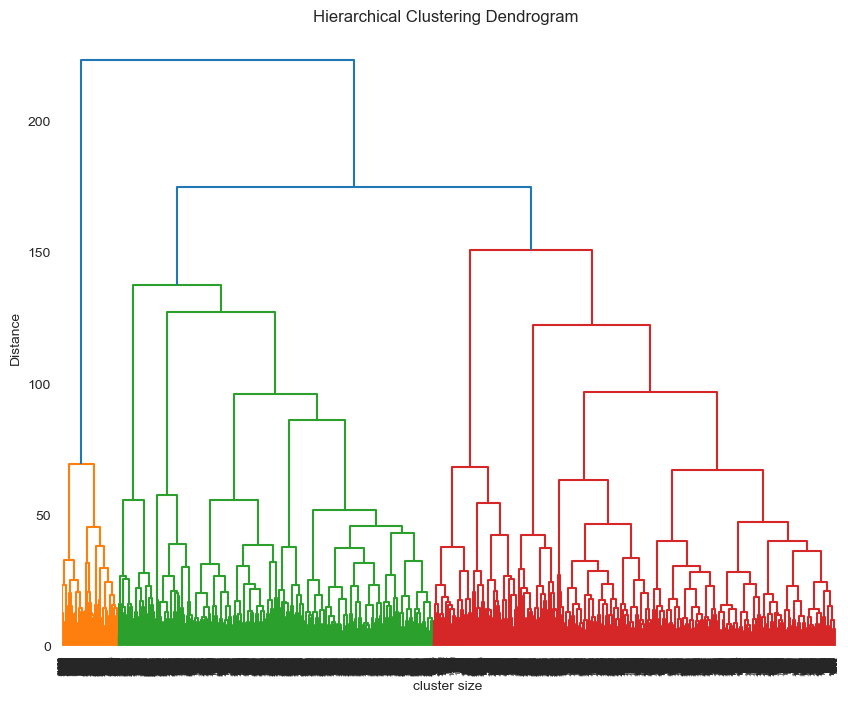

In [983]:
plt.figure(figsize=(10, 8))
dendrogram(
    Z,
    #truncate_mode='lastp',  # Tronquer les autres branches
    #p=10,  # Afficher seulement les 10 derniers noeuds formés
    #show_leaf_counts=True
)
plt.title("Hierarchical Clustering Dendrogram ")
plt.xlabel("cluster size")
plt.ylabel("Distance")


#### Analyse des résultats

Nous avons choisi de réaliser 4 regroupements pour le clustering hiérarchique. Pour chaque cluster, nous identifions les points discriminants en comparant le centroïde de chaque cluster aux centroïdes des autres clusters. Une figure sera tracée pour chaque attribut.

In [984]:
import copy
k = 4 
cluster_labels = fcluster(Z, k, criterion='maxclust')

hits_analysis = copy.copy(hits) 
hits_analysis['cluster'] = cluster_labels



In [985]:
clusters = hits_analysis.groupby('cluster')
cluster_means = clusters.mean()

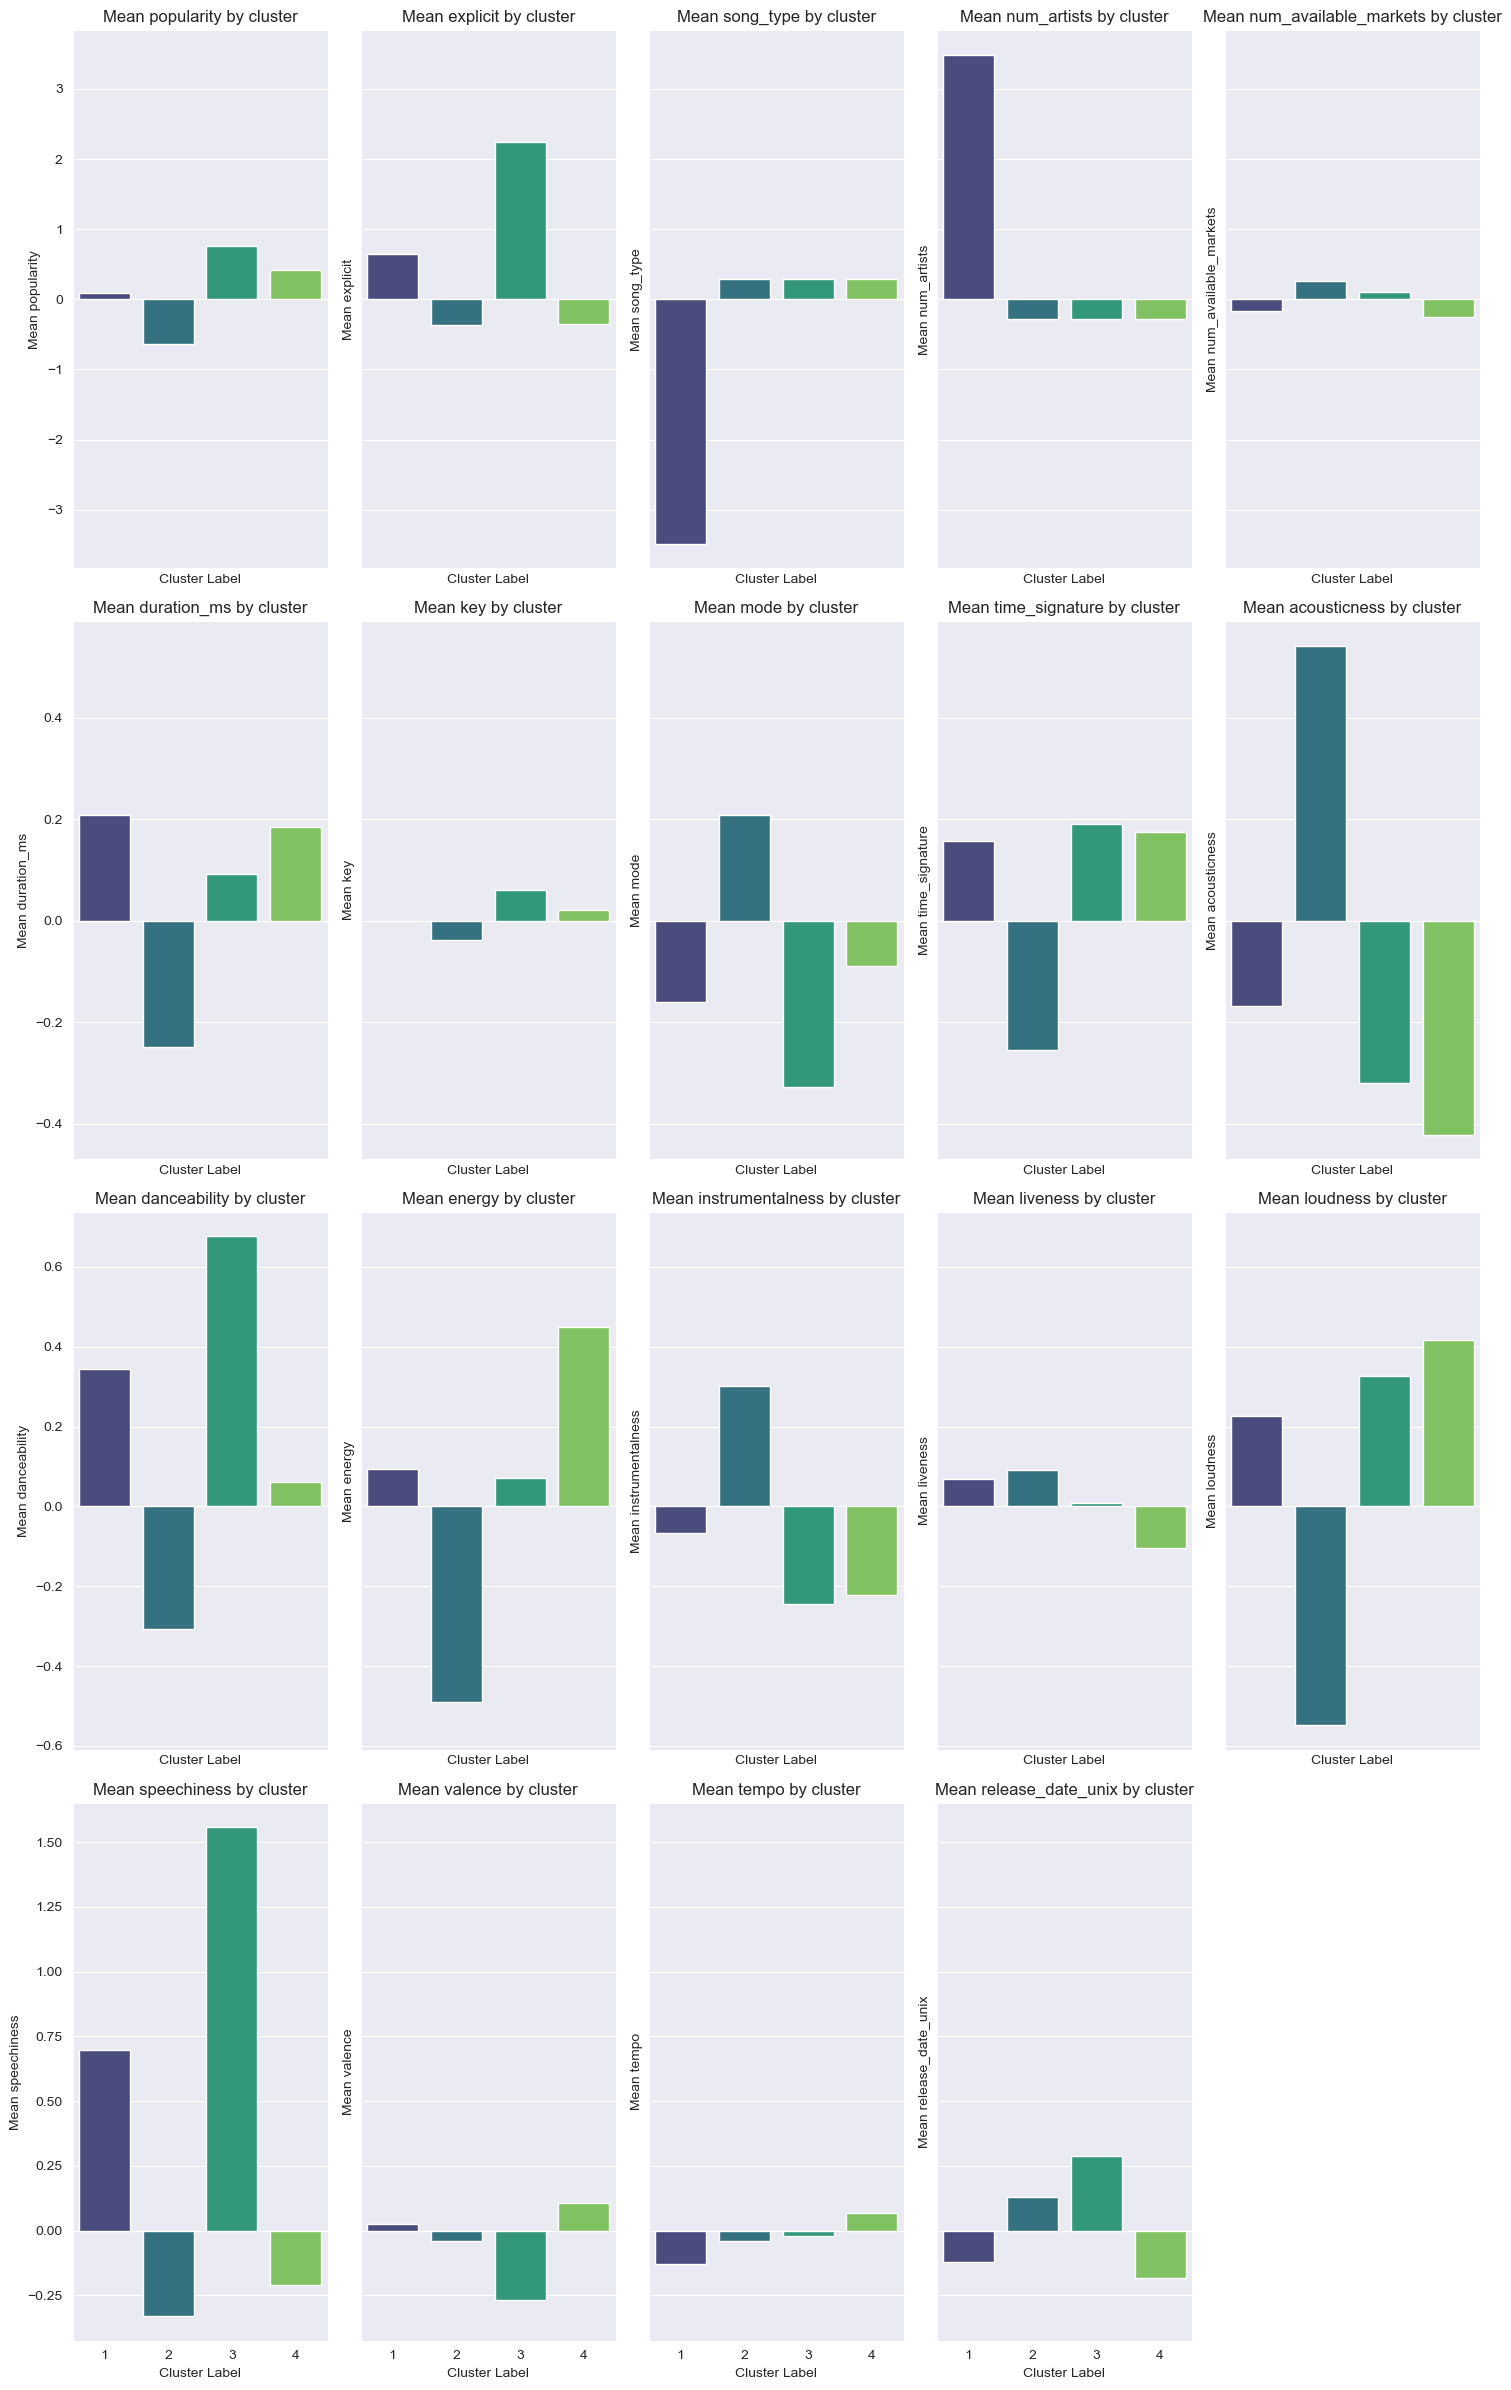

In [986]:
import matplotlib.pyplot as plt
import seaborn as sns

num_columns = len(cluster_means.columns)
ncols = 5
nrows = (num_columns + ncols - 1) // ncols  # Arrondi à l'entier supérieur pour inclure tous les subplots

# Créer la figure et les axes
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 6 * nrows), sharex='col', sharey='row')

# Parcourir toutes les variables et créer un graphe pour chaque
for i, column in enumerate(cluster_means.columns):
    ax = axes[i // ncols, i % ncols]  # Calculer la position correcte de l'axe dans la grille
    sns.barplot(x=cluster_means.index, y=cluster_means[column], ax=ax, palette='viridis')
    ax.set_title(f'Mean {column} by cluster')
    ax.set_xlabel('Cluster Label')
    ax.set_ylabel(f'Mean {column}')

# Cacher les axes qui ne sont pas utilisés (si le nombre de variables n'est pas un multiple de 5)
for j in range(i + 1, nrows * ncols):
    axes[j // ncols, j % ncols].set_visible(False)

# Ajuster l'espacement entre les subplots et afficher la figure
plt.tight_layout()
plt.show()

##### Cluster 1:
Le Cluster 1 se distingue par un très faible score de song_type, indiquant des chansons de genre très spécifique. Il présente un nombre élevé d'artistes (num_artists), suggérant des collaborations fréquentes, ainsi qu'une speechiness importante, signalant une forte présence de paroles parlées (probablement du rap ou spoken word).


In [987]:
print(raw_hits.loc[hits_analysis['cluster'] == 1].head(5))

                                         song_name  \
3    Sunflower - Spider-Man: Into the Spider-Verse   
21                                          Uproar   
40                                      Fine China   
103                                     Astronauts   
106                               Kiss and Make Up   

                     name_artists  popularity  explicit      song_type  \
3     ['Post Malone', 'Swae Lee']          92     False  Collaboration   
21   ['Lil Wayne', 'Swizz Beatz']          73      True  Collaboration   
40       ['Future', 'Juice WRLD']          78      True  Collaboration   
103      ['Future', 'Juice WRLD']          62      True  Collaboration   
106     ['Dua Lipa', 'BLACKPINK']          79     False  Collaboration   

     num_artists  num_available_markets release_date  duration_ms  key  ...  \
3              2                     79   2018-12-14       158040    2  ...   
21             2                     79   2018-09-28       194184    1  

Il s'agit donc d'un cluster représentant les chansons collaboratives avec beaucoups de paroles

##### Cluster 2:
Le Cluster 2 est marqué par une faible popularity et des scores élevés en acousticness et instrumentalness, indiquant des morceaux principalement acoustiques et instrumentaux, comme du classique ou de la folk. Ce cluster est aussi caractérisé par une faible energy et un faible niveau sonore (loudness), suggérant des chansons plus calmes. Comme pour le Cluster 1, key et mode sont peu pertinents ici.

In [988]:
print(raw_hits.loc[hits_analysis['cluster'] == 1].head(5))

                                         song_name  \
3    Sunflower - Spider-Man: Into the Spider-Verse   
21                                          Uproar   
40                                      Fine China   
103                                     Astronauts   
106                               Kiss and Make Up   

                     name_artists  popularity  explicit      song_type  \
3     ['Post Malone', 'Swae Lee']          92     False  Collaboration   
21   ['Lil Wayne', 'Swizz Beatz']          73      True  Collaboration   
40       ['Future', 'Juice WRLD']          78      True  Collaboration   
103      ['Future', 'Juice WRLD']          62      True  Collaboration   
106     ['Dua Lipa', 'BLACKPINK']          79     False  Collaboration   

     num_artists  num_available_markets release_date  duration_ms  key  ...  \
3              2                     79   2018-12-14       158040    2  ...   
21             2                     79   2018-09-28       194184    1  

##### Cluster 3:
Le Cluster 3 est le plus rythmé et populaire. Il présente une danceability et une speechiness élevées, ce qui suggère des morceaux propices à la danse avec beaucoup de paroles, typiques du rap ou de l'électro. Les chansons sont plus récentes et populaires, renforçant leur nature contemporaine. L'attribut liveness n'est pas très pertinent pour ce groupe.

In [989]:
print(raw_hits.loc[hits_analysis['cluster'] == 2].head(5))

                  song_name       name_artists  popularity  explicit  \
5   A Holly Jolly Christmas      ['Burl Ives']           3     False   
16               Speechless     ['Dan + Shay']          75     False   
17                Love Lies  ['2018 DJ Grime']           4     False   
18                   Better         ['Khalid']          75     False   
25                Best Shot   ['Jimmie Allen']          71     False   

   song_type  num_artists  num_available_markets release_date  duration_ms  \
5       Solo            1                     77   2015-10-28       133547   
16      Solo            1                     78   2018-06-22       213387   
17      Solo            1                     79   2018-02-22       202998   
18      Solo            1                     77   2018-09-14       229413   
25      Solo            1                     78   2018-10-12       195053   

    key  ...  time_signature  acousticness  danceability  energy  \
5     0  ...               4  

##### Cluster 4:
Le Cluster 4 se caractérise par des chansons très énergiques et bruyantes (energy et loudness), probablement du rock ou de la pop dynamique.Les morceaux ont une valence positive, suggérant une tonalité joyeuse.

In [990]:
print(raw_hits.loc[hits_analysis['cluster'] == 3].head(5))

       song_name       name_artists  popularity  explicit song_type  \
0  thank u, next  ['Ariana Grande']          87      True      Solo   
1     Without Me         ['Halsey']          87      True      Solo   
2     SICKO MODE   ['Travis Scott']          86      True      Solo   
6       Mo Bamba      ['Sheck Wes']          81      True      Solo   
7       breathin  ['Ariana Grande']          79      True      Solo   

   num_artists  num_available_markets release_date  duration_ms  key  ...  \
0            1                     79   2019-02-08       207320    1  ...   
1            1                     79   2018-10-04       201661    6  ...   
2            1                     79   2018-08-03       312820    8  ...   
6            1                     79   2018-10-05       183907    4  ...   
7            1                     79   2018-08-17       198160    8  ...   

   time_signature  acousticness  danceability  energy  instrumentalness  \
0               4       0.22900    

#### Analyse des features intéressantes 
On remarque ici que des la moyenne des variables que sont  'tempo' ,'key' et 'num_available_markets' restent globalement les mêmes quelque soit le cluster choisi. On peut donc conclure que ces variables ne sont pas intéressantes quant au regroupement des données utilisant le hierarchical clustering avec 4 clusters.

## Partie 3 - Systèmes de recommandation avec clustering/Recommendation systems using clustering

### Q8 - Recommander des chansons/Recommending Songs **(4 pt)**

#### **Les systèmes de recommandation** sont des algorithmes conçus pour suggérer des éléments pertinents aux utilisateurs en fonction de leurs préférences, de leur comportement ou de leurs interactions passées. Ils jouent un rôle crucial dans le filtrage de grandes quantités de données, en fournissant des recommandations personnalisées pour chaque utilisateur.

#### Dans cette question, vous devez construire un système de recommandation en utilisant le clustering. En utilisant la technique de votre choix, trouvez les meilleures suggestions musicales pour les chansons suivantes. Cependant, utilisez l'ensemble de données complet, *TP2_nonhits.csv*, pour cette tâche.  Vous pouvez télécharger le jeu de données ici: https://1drv.ms/f/s!AokVPhU6GPPQkv4NipxQg8IFaeRN6w. 

1) Id 3 - Ariana Grande, *Fake Smile*
2) Id 13252 - Kanye West, *All of the Lights* 
3) Id 284228 - Metallica, *Nothing Else Matters*
4) Id 386296 - Céline Dion, *Pour que tu m'aimes encore*  
5) Id 511119 - Aerosmith, *Dream On*  

#### Comme d'habitude, fournissez une analyse écrite de vos résultats. Toutes les caractéristiques sont-elles utiles? Existe-t-il une technique de clustering plus efficace pour construire un système de recommandation? Est-ce qu'il y a des caractéristiques mieux adaptées pour indiquer différents styles, différents artistes?

-----

#### **Recommendation systems** are algorithms designed to suggest relevant items to users based on their preferences, behavior, or past interactions. They play a crucial role in filtering vast amounts of data, providing personalized recommendations for each user.

#### In this question, you must build a recommendation system using clustering. Using the technique of your choice, find the best music suggestions for the following songs. However, use the full dataset, *TP2_nonhits.csv*, for this task. You can download the dataset here: https://1drv.ms/f/s!AokVPhU6GPPQkv4NipxQg8IFaeRN6w. 

1) Id 3 - Ariana Grande, *Fake Smile*  
2) Id 13252 - Kanye West, *All of the Lights*  
3) Id 284228 - Metallica, *Nothing Else Matters*  
4) Id 386296 - Celine Dion, *Pour que tu m'aimes encore*  
5) Id 511119 - Aerosmith, *Dream On*  

#### As usual, provide a written analysis of your results. Are all the features useful? Is there any clustering technique that is more effective for building a recommendation system? Are there features better suited to indicate different styles, different artists?

In [991]:
### CODE
non_hits = pd.read_csv('TP2_nonhits.csv', delimiter=';')

In [992]:
# Initialisation du scaler et de l'encodeur
scaler = StandardScaler()
encoder = LabelEncoder()

# Préparation des données sans 'song_name' et 'name_artists'
numerical_data = non_hits.drop(columns=['song_name', 'name_artists'])
numerical_data['explicit'] = numerical_data['explicit'].astype(int)

# Extraction de l'année uniquement
numerical_data['release_date'] = pd.to_datetime(numerical_data['release_date'])
numerical_data['year'] = numerical_data['release_date'].dt.year
numerical_data.drop(columns='release_date', inplace=True)  # Supprime release_date

# Encodage de 'song_type'
numerical_data['song_type'] = encoder.fit_transform(numerical_data['song_type'])

# Remplacement des valeurs non numériques et conversion en numérique
numerical_data.replace('-', np.nan, inplace=True)
for col in numerical_data.columns:
    if numerical_data[col].dtype == 'object':
        numerical_data[col] = pd.to_numeric(numerical_data[col], errors='coerce')

# Imputation des valeurs manquantes avec la moyenne
imputer = SimpleImputer(strategy='mean')
numerical_data_imputed = imputer.fit_transform(numerical_data)

# Normalisation des données
non_hits = pd.DataFrame(scaler.fit_transform(numerical_data_imputed), columns=numerical_data.columns)


In [993]:
# Séparer 'song_id' avant l'imputation et la normalisation
song_id_column = numerical_data['song_id']

# Imputation des valeurs manquantes avec la moyenne
imputer = SimpleImputer(strategy='mean')
numerical_data_imputed = pd.DataFrame(imputer.fit_transform(numerical_data.drop(columns=['song_id'])), columns=numerical_data.columns.drop('song_id'))

# Normalisation des données (sauf 'song_id')
non_hits_normalized = pd.DataFrame(scaler.fit_transform(numerical_data_imputed), columns=numerical_data_imputed.columns)

# Réintégrer 'song_id' dans le DataFrame normalisé
non_hits_normalized['song_id'] = song_id_column

# Affichage du DataFrame après imputation et normalisation
print("DataFrame après imputation et normalisation :")
print(non_hits_normalized)


DataFrame après imputation et normalisation :
        popularity  explicit  song_type  num_artists  num_available_markets  \
0         5.645966  3.790501   0.299158    -0.299158               0.375298   
1         5.645966 -0.263817   0.299158    -0.299158               0.375298   
2         5.482264  3.790501   0.299158    -0.299158               0.375298   
3         5.400413  3.790501   0.299158    -0.299158               0.375298   
4         5.482264 -0.263817   0.299158    -0.299158               0.375298   
...            ...       ...        ...          ...                    ...   
899063    0.734916 -0.263817  -3.342716     3.342716              -3.054327   
899064   -0.574698 -0.263817   0.299158    -0.299158               0.375298   
899065   -0.574698 -0.263817   0.299158    -0.299158               0.375298   
899066   -0.574698 -0.263817   0.299158    -0.299158               0.375298   
899067   -0.574698 -0.263817   0.299158    -0.299158               0.375298   

     

In [994]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

# Appliquer K-Means sur les données
n_clusters = 10  # Vous pouvez ajuster ce nombre selon vos besoins
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
non_hits_normalized['kmeans_cluster'] = kmeans.fit_predict(non_hits_normalized.drop(columns='song_id'))

# Chansons à recommander
song_ids = [3, 13252, 284228, 386296, 511119]
recommended_songs = {}

# Trouver les recommandations pour chaque chanson donnée
for song_id in song_ids:
    if song_id in non_hits_normalized['song_id'].values:
        # Trouver le cluster de la chanson
        song_cluster = non_hits_normalized[non_hits_normalized['song_id'] == song_id]['kmeans_cluster'].values[0]
        
        # Sélectionner toutes les chansons ayant le même cluster, sauf la chanson elle-même
        recommendations = non_hits_normalized[
            (non_hits_normalized['kmeans_cluster'] == song_cluster) & 
            (non_hits_normalized['song_id'] != song_id)
        ]
        
        # Extraire les caractéristiques de la chanson cible
        song_features = non_hits_normalized[non_hits_normalized['song_id'] == song_id].drop(
            columns=['song_id', 'kmeans_cluster']
        )
        
        # Calcul des distances euclidiennes entre la chanson cible et toutes les autres chansons du même cluster
        distances = cdist(
            recommendations.drop(columns=['song_id', 'kmeans_cluster']),
            song_features,
            metric='euclidean'
        )
        
        # Ajouter les distances aux recommandations
        recommendations.loc[:, 'distance'] = distances
        
        # Trier les chansons par distance croissante et prendre les 5 plus proches
        recommendations = recommendations.sort_values(by='distance').head(5)
        
        # Stocker les recommandations
        recommended_songs[song_id] = recommendations[[
            'song_id', 'popularity', 'explicit', 'song_type', 'duration_ms', 'key', 'mode', 'loudness', 'year'
        ]]
    else:
        print(f"La chanson ID {song_id} n'existe pas dans le DataFrame.")

# Afficher les recommandations avec leurs attributs
for song_id, recs in recommended_songs.items():
    print(f"\nRecommandations pour la chanson ID {song_id}:")
    print(recs)



Recommandations pour la chanson ID 3:
       song_id  popularity  explicit  song_type  duration_ms       key  \
20402    20402    4.254502  3.790501   0.299158    -0.592996  1.072418   
12271    12271    4.090800  3.790501   0.299158     0.012030  0.789444   
21887    21887    4.336353  3.790501   0.299158     0.137731 -0.059479   
27404    27404    4.663756  3.790501   0.299158    -1.061348  1.638367   
19979    19979    4.172651  3.790501   0.299158    -0.454961  0.223495   

           mode  loudness      year  
20402  0.647287  0.878413  1.201178  
12271  0.647287  0.990337  1.374046  
21887  0.647287  0.297010  0.509708  
27404  0.647287  0.253017  0.682576  
19979  0.647287  0.822559  0.163973  

Recommandations pour la chanson ID 13252:
        song_id  popularity  explicit  song_type  duration_ms       key  \
41918     41918    3.681546  3.790501   0.299158    -1.637360  1.638367   
406134   406134    1.144170  3.790501   0.299158    -0.501340  0.223495   
681046   681046    1

# 1. Recommandations pour la Chanson ID 3 :
Les chansons recommandées ont des valeurs similaires pour des attributs tels que :
- **Popularity** (entre 4.09 et 4.66)
- **Explicit** (3.79 pour toutes)
- **Song Type** (0.299 pour toutes)

La durée et la tonalité varient un peu, mais restent dans une plage restreinte. L'année est normalisée, avec des chansons dans un intervalle proche de la chanson de référence. Cela indique une certaine cohérence temporelle.  
Lorsque l'on écoute les musiques, elles sont toutes du style **R&B** avec un tempo assez lent. On peut clairement observer une ressemblance entre les sons.

# 2. Recommandations pour la chanson ID 13252 :
Ici, les valeurs de **popularity** sont un peu plus basses (de 1.14 à 3.68), mais **explicit** et **song_type** restent constants.  
Il y a plus de variabilité dans **duration_ms** et **loudness**, mais cela reste gérable. L'année reste normalisée autour d'une période relativement cohérente.  
Les musiques recommandées se ressemblent, c'est-à-dire des chansons avec un tempo assez lent, cependant elles ne ressemblent pas à la musique que nous cherchons à recommander.

# 3. Recommandations pour la chanson ID 284228 :
Ces recommandations ont des valeurs de **popularity** assez basses (entre 0.57 et 2.86), et **explicit** est également différent (-0.26).  
Il y a des variations plus importantes dans **duration_ms**, mais **song_type** reste constant. Les valeurs de **year** sont normalisées, mais ici, elles sont davantage réparties, ce qui peut indiquer des chansons provenant d'une période plus diversifiée.

# 4. Recommandations pour la chanson ID 386296 :
Les chansons ont des valeurs de **popularity** de 1.39 à 3.27, ce qui reste dans un intervalle assez serré.  
**Explicit** reste constant à -0.26, et **song_type** est stable. La durée ne varie pas trop, et les valeurs de **year** montrent une certaine dispersion, indiquant une variation temporelle modérée.

# 5. Recommandations pour la chanson ID 511119 :
Les chansons recommandées ont des valeurs de **popularity** entre 1.47 et 2.29, avec **explicit** de 3.79 pour toutes.  
**Duration_ms** montre quelques différences, mais **song_type** reste constant. La **year** normalisée est assez homogène, indiquant des chansons proches en termes de date de sortie.

---

### Utilité des caractéristiques :
Certaines caractéristiques sont clairement plus pertinentes que d'autres. Par exemple, la **popularity**, la **key** (tonalité), le **mode**, la **loudness** (intensité sonore) et l'**année** semblent jouer un rôle important pour le style musical et la popularité.  
En revanche, le **jour** et le **mois** de la date de sortie n'ajoutent pas de valeur significative à l'analyse, car ces informations sont peu corrélées au style musical et au contenu de la chanson.

### Techniques de clustering alternatives :
Le **KMeans** est un bon choix de base, mais il peut ne pas toujours saisir des similarités subtiles, surtout si les données ne sont pas strictement linéaires, comme nous avons pu le voir pour la chanson ID 13252.  
Des méthodes comme **DBSCAN** (pour des regroupements de densité) ou **Mean Shift** (si les clusters ne sont pas de taille uniforme) pourraient mieux capturer des regroupements naturels dans les données. L’algorithme de **clustering hiérarchique** pourrait aussi être utile pour observer des regroupements multi-niveaux (par exemple, genre > sous-genre). Cependant, ces algorithmes sont souvent très lents à calculer, surtout pour des ensembles de données volumineux comme le nôtre, ce qui peut rendre leur utilisation moins pratique dans des scénarios avec un grand nombre d'exemples. Nous aurions pu échantillonné nos données pour améliorer le temps de performance. Cependant cela aurait conduit à ne pas utiliser l'entièreté des données (comme ce qui était voulu)

### Caractéristiques pour styles et artistes :
Les caractéristiques **popularity**, **song_type**, **duration_ms** (durée), **loudness**, et **key** semblent particulièrement pertinentes pour différencier les styles et artistes.  
Par exemple, la **loudness** et la **durée** peuvent indiquer des préférences stylistiques spécifiques (chansons courtes et bruyantes pour certains genres comme le rock ou des morceaux plus longs et modérés pour le jazz).
